<a href="https://colab.research.google.com/github/Fede00729/porfolio/blob/main/coffee_vs_starbucks_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import requests, json, csv, time
import sqlite3

In [33]:
commodity = 'COFFEE'
stock = 'SBUX'
interval = 'monthly'
key = 'D7KN65WL2FMDXH33'
type_data = "json"

tables = ["commodity", "stock"]

In [30]:
url = f'https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol={stock}&apikey={key}&datatype={type_data}'
response = requests.get(url)
ticket_info = json.loads(response.text)
time.sleep(3)
print(ticket_info)

url1 = f'https://www.alphavantage.co/query?function={commodity}&interval={interval}&apikey={key}'
response = requests.get(url1)
comm_info = json.loads(response.text)
time.sleep(3)
print(comm_info)

{'Meta Data': {'1. Information': 'Monthly Prices (open, high, low, close) and Volumes', '2. Symbol': 'SBUX', '3. Last Refreshed': '2023-10-23', '4. Time Zone': 'US/Eastern'}, 'Monthly Time Series': {'2023-10-23': {'1. open': '91.0500', '2. high': '95.6600', '3. low': '89.2100', '4. close': '94.2000', '5. volume': '87215612'}, '2023-09-29': {'1. open': '98.4000', '2. high': '98.7500', '3. low': '90.2099', '4. close': '91.2700', '5. volume': '113133545'}, '2023-08-31': {'1. open': '101.4700', '2. high': '104.4600', '3. low': '93.7100', '4. close': '97.4400', '5. volume': '127095831'}, '2023-07-31': {'1. open': '98.7300', '2. high': '103.7700', '3. low': '95.5500', '4. close': '101.5700', '5. volume': '131344332'}, '2023-06-30': {'1. open': '97.5900', '2. high': '102.5100', '3. low': '96.5200', '4. close': '99.0600', '5. volume': '151111110'}, '2023-05-31': {'1. open': '114.2520', '2. high': '115.4800', '3. low': '96.9800', '4. close': '97.6400', '5. volume': '157237331'}, '2023-04-28': {

In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
db_path = '/content/drive/My Drive/SQL_easy_test2.db'
conn = sqlite3.connect(db_path)

In [71]:
cur = conn.cursor()
clean = 'DROP TABLE IF EXISTS {};'
sql = '''
CREATE TABLE IF NOT EXISTS {} (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        date DATE,
        price REAL
    )
'''
for table in tables:
  cur.execute(clean.format(table))
  cur.execute(sql.format(table))
  print(table)
conn.commit()

commodity
stock


In [72]:
try:
  for entry in comm_info["data"]:
    date = entry["date"]
    price = float(entry["value"])
    cur.execute('INSERT OR REPLACE INTO {} (date, price) VALUES (?, ?)'.format(tables[0]), (date, price))
except ValueError as e:
    print(f"Error al leer datos: {e}")

conn.commit()

Error al leer datos: could not convert string to float: '.'


In [73]:
try:
  for date, data_point in ticket_info["Monthly Time Series"].items():
      close_price = float(data_point["4. close"])
      cur.execute('INSERT OR REPLACE INTO {} (date, price) VALUES (?, ?)'.format(tables[1]), (date, close_price))
except ValueError as e:
    print(f"Error al leer datos: {e}")

conn.commit()
conn.close()

In [74]:
conn = sqlite3.connect(db_path)
query = f"SELECT * FROM {tables[0]}"
df1 = pd.read_sql_query(query, conn)
print(df1)

query = f"SELECT * FROM {tables[1]}"
df2 = pd.read_sql_query(query, conn)
print(df2)
conn.close()

      id        date       price
0      1  2023-09-01  183.589048
1      2  2023-08-01  186.346957
2      3  2023-07-01  193.494286
3      4  2023-06-01  207.385000
4      5  2023-05-01  220.121304
..   ...         ...         ...
400  401  1990-05-01   92.019989
401  402  1990-04-01   93.730011
402  403  1990-03-01   93.959991
403  404  1990-02-01   84.010010
404  405  1990-01-01   75.829987

[405 rows x 3 columns]
      id        date   price
0      1  2023-10-23   94.20
1      2  2023-09-29   91.27
2      3  2023-08-31   97.44
3      4  2023-07-31  101.57
4      5  2023-06-30   99.06
..   ...         ...     ...
282  283  2000-04-28   30.23
283  284  2000-03-31   44.81
284  285  2000-02-29   35.13
285  286  2000-01-31   32.00
286  287  1999-12-31   24.25

[287 rows x 3 columns]


In [75]:
import matplotlib.pyplot as plt

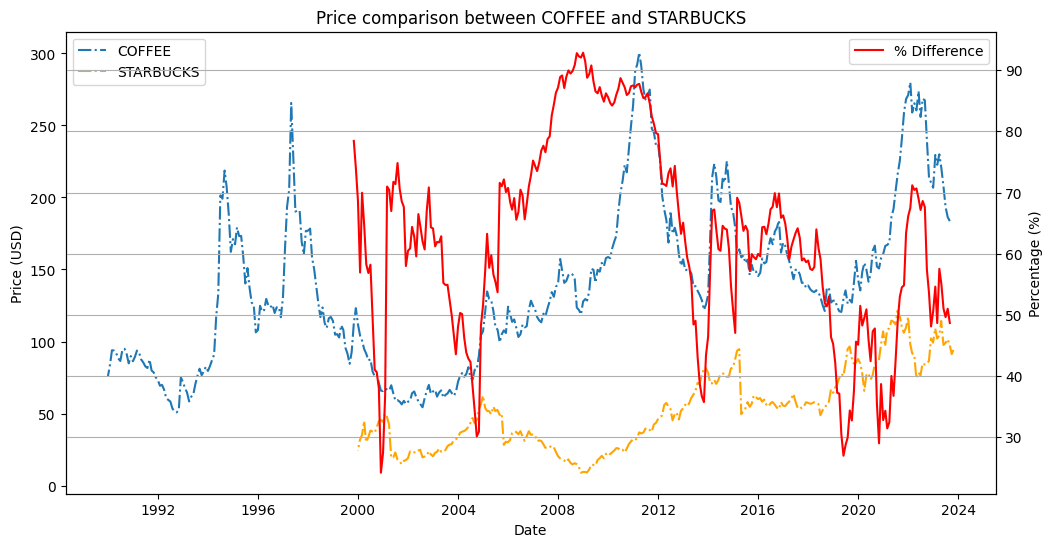

In [131]:
df1['date'] = pd.to_datetime(df1['date'])
df2['date'] = pd.to_datetime(df2['date'])
percentage_difference = ((df1['price'] - df2['price']) / df1['price']) * 100

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(df1['date'], df1['price'], label='COFFEE', linestyle='-.')
ax1.plot(df2['date'], df2['price'], label='STARBUCKS', linestyle='-.', color='orange')

ax1.set_xlabel('Date')
ax1.set_ylabel('Price (USD)')
ax1.set_title('Price comparison between COFFEE and STARBUCKS')

ax2 = ax1.twinx()
ax2.plot(df1['date'], percentage_difference, label='% Difference', linestyle='-', color='r')
ax2.set_ylabel('Percentage (%)')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.grid()

plt.show()